In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
housing = fetch_california_housing()

In [3]:
X, y = housing.data, housing.target
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, random_state=7)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_all, y_train_all, random_state=11)

In [4]:
stand_scale = StandardScaler()

x_train_trans = stand_scale.fit_transform(X_train)
x_valid_trans = stand_scale.transform(X_valid)
x_test_trans = stand_scale.transform(X_test)

In [5]:
print(x_train_trans.shape, y_train.shape)
print(x_valid_trans.shape, y_test.shape)
print(x_test_trans.shape, y_valid.shape)

(11610, 8) (11610,)
(3870, 8) (5160,)
(5160, 8) (3870,)


In [7]:
# 子类APTI
class WideDeepModel(keras.models.Model):
    def __init__(self):
        # 设置模型的层次
        super(WideDeepModel, self).__init__()
        self.hidden_layer1 = keras.layers.Dense(30, activation="relu")
        self.hidden_layer2 = keras.layers.Dense(30, activation="relu")
        self.output_layer = keras.layers.Dense(1)
        
    def call(self, input):
        # 完成正向计算
        hidden1 = self.hidden_layer1(input)
        hidden2 = self.hidden_layer2(hidden1)
        
        concat = keras.layers.concatenate([input, hidden2])
        output = self.output_layer(concat)
        return output

model = keras.models.Sequential([WideDeepModel()])
model.build(input_shape=(None, 8))

In [8]:
"""
# 函数式实现Wide&Deep模型
input = keras.layers.Input(shape=x_train_trans.shape[1:])
hidden1 = keras.layers.Dense(100, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input],
                           outputs=[output])
"""
"""
model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1)
])
"""
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

In [9]:
model.compile(optimizer= keras.optimizers.SGD(0.001), loss="mse")

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
wide_deep_model_1 (WideDeepM (None, 1)                 1239      
Total params: 1,239
Trainable params: 1,239
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(x_train_trans, y_train, 
                    validation_data=(x_valid_trans, y_valid), 
                    epochs=100, 
                    callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 1.9688 - val_loss: 0.7621
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6575 - val_loss: 0.6637
Epoch 3/100
363/363 [==============================] - ETA: 0s - loss: 0.606 - 1s 2ms/step - loss: 0.6039 - val_loss: 0.6459
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5809 - val_loss: 0.6271
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5643 - val_loss: 0.6032
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5509 - val_loss: 0.5857
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5405 - val_loss: 0.5758
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5305 - val_loss: 0.5623
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5225 - val_loss: 0.5544
Epoch 10/100
363/363 [==============================] - 1s 3ms/step

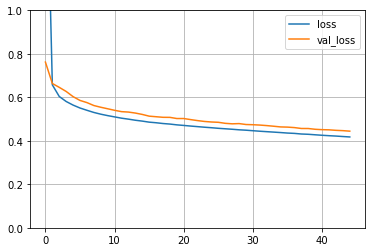

In [14]:
def plt_learning_curve(history):
    pd.DataFrame(history).plot(figsize=(6,4))
    plt.grid(True)
    plt.ylim(0, 1)
    plt.show()
    
plt_learning_curve(history.history)

In [13]:
model.evaluate(x_test_trans, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4367


0.436702698469162